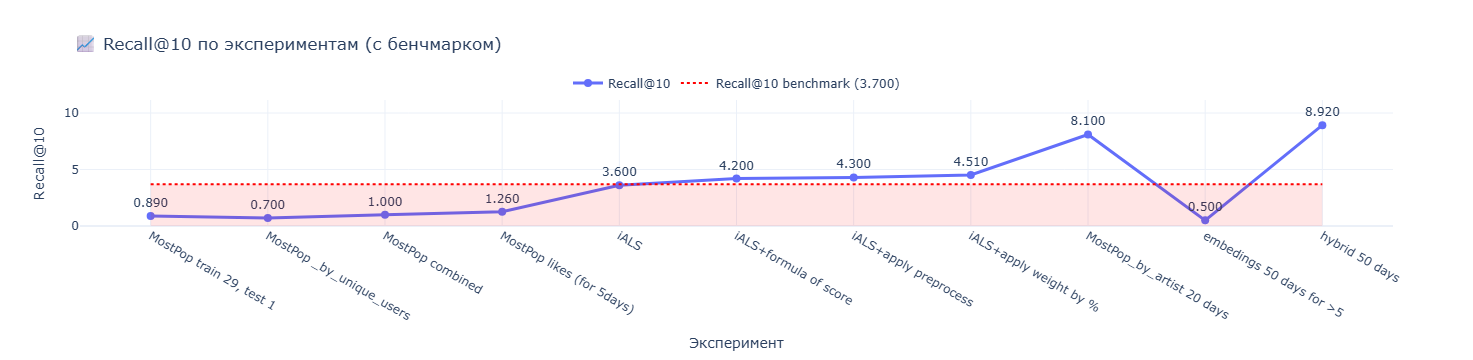

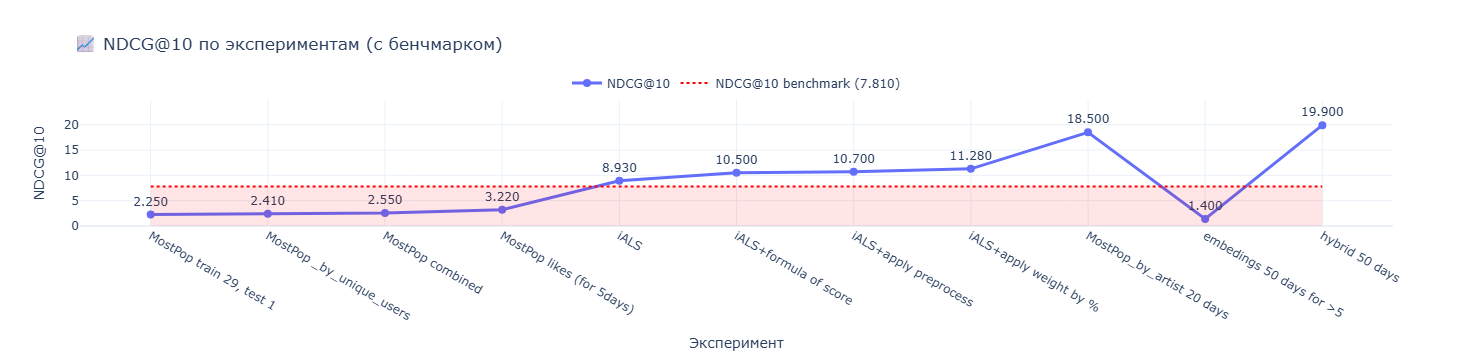

In [1]:
import plotly.graph_objects as go

def plot_metric_with_benchmark(
    metric_name: str,
    metric_values: list[float],
    experiment_names: list[str],
    benchmark_value: float | None = None,
    dashed: bool = False,
    fill_color: str = "rgba(255, 0, 0, 0.1)"  # красный с прозрачностью
):
    """
    Рисует график метрики по экспериментам + горизонтальную линию-бенчмарк
    + подсветку (заливку) до линии бенчмарка.
    """

    if len(metric_values) != len(experiment_names):
        raise ValueError("Длины metric_values и experiment_names должны совпадать")

    fig = go.Figure()

    # === Основная линия метрики ===
    fig.add_trace(go.Scatter(
        x=experiment_names,
        y=metric_values,
        mode="lines+markers+text",
        name=metric_name,
        text=[f"{v:.3f}" for v in metric_values],
        textposition="top center",
        line=dict(width=3, dash="dash" if dashed else "solid"),
        marker=dict(size=8)
    ))

    # === Горизонтальная линия-бенчмарк ===
    if benchmark_value is not None:
        # Заливка до бенчмарка
        fig.add_trace(go.Scatter(
            x=[experiment_names[0], experiment_names[-1], experiment_names[-1], experiment_names[0]],
            y=[0, 0, benchmark_value, benchmark_value],
            fill="toself",
            fillcolor=fill_color,
            line=dict(color="rgba(255,0,0,0)"),  # без контура
            hoverinfo="skip",
            showlegend=False
        ))

        # Линия-бенчмарк
        fig.add_trace(go.Scatter(
            x=[experiment_names[0], experiment_names[-1]],
            y=[benchmark_value, benchmark_value],
            mode="lines",
            name=f"{metric_name} benchmark ({benchmark_value:.3f})",
            line=dict(width=2, dash="dot", color="red")
        ))

    # === Настройки осей и оформления ===
    y_max = max(metric_values + ([benchmark_value] if benchmark_value else [0])) * 1.25

    fig.update_layout(
        title=f"📈 {metric_name} по экспериментам (с бенчмарком)",
        xaxis_title="Эксперимент",
        yaxis_title=metric_name,
        yaxis=dict(range=[0, y_max]),
        template="plotly_white",
        hovermode="x unified",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )

    return fig



experiments = [
    "MostPop train 29, test 1",
    "MostPop _by_unique_users",
    "MostPop combined",
        "MostPop likes (for 5days)", 
    "iALS",
    "iALS+formula of score",
    "iALS+apply preprocess",
    "iALS+apply weight by %",
    # "MostPop_by_artist",
    "MostPop_by_artist 20 days",
    "embedings 50 days for >5",
    "hybrid 50 days ",
    

]


recall_scores = [0.89, 0.70, 1.00, 1.26, 3.6, 4.2, 4.3, 4.51, 8.1, 0.5, 8.92]
ndcg_scores   = [2.25, 2.41, 2.55,  3.22, 8.93, 10.5, 10.7, 11.28, 18.5, 1.4, 19.9]


# 1) график Recall@10
fig_recall = plot_metric_with_benchmark(
    "Recall@10", recall_scores, experiments,
    benchmark_value=3.7,    # максимум авторов по Recall
    dashed=False
)
fig_recall.show()

# 2) график NDCG@10
fig_ndcg = plot_metric_with_benchmark(
    "NDCG@10", ndcg_scores, experiments,
    benchmark_value=7.81,    # максимум авторов по NDCG
    dashed=False              # отличим стиль линий, если хочешь
)
fig_ndcg.show()

# После ужесточения условий точность просела - что логично. ПРи очиске лайков особо ничего не поменялось а так же при 
# На ранних этапах было принято решение увеличить время предсказания так как 1 день слишком жестко а 299 на трейне слишком много, много обобщения
# для ALS пришлось повысить длину вектора 

